In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
dataset=sns.load_dataset('titanic')

In [143]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [144]:
dataset.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [145]:
dataset=dataset.dropna()

In [146]:
dataset.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [147]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [148]:
from sklearn.preprocessing import LabelEncoder
le_encode=LabelEncoder()

In [149]:
dataset['alone']=le_encode.fit_transform(dataset['alone'])

/tmp/ipython-input-3782461137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['alone']=le_encode.fit_transform(dataset['alone'])


In [150]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,0
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,0
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,1
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,1


In [151]:
ohe_encode=['survived','pclass','sibsp','parch','sex','embarked','class',	'who','adult_male','deck','embark_town','alive']

In [152]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(dataset[ohe_encode])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(ohe_encode))
dataset_dropped=dataset.drop(columns=ohe_encode,axis=1).reset_index(drop=True)
df=pd.concat([encoded_df,dataset_dropped],axis=1)
df

,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sibsp_0,sibsp_1,sibsp_2,sibsp_3,parch_0,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,age,fare,alone
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,38.0,71.2833,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,53.1000,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,54.0,51.8625,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,16.7000,0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,58.0,26.5500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,47.0,52.5542,0
178,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,33.0,5.0000,1
179,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,56.0,83.1583,0
180,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0,30.0000,1


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived_0               182 non-null    float64
 1   survived_1               182 non-null    float64
 2   pclass_1                 182 non-null    float64
 3   pclass_2                 182 non-null    float64
 4   pclass_3                 182 non-null    float64
 5   sibsp_0                  182 non-null    float64
 6   sibsp_1                  182 non-null    float64
 7   sibsp_2                  182 non-null    float64
 8   sibsp_3                  182 non-null    float64
 9   parch_0                  182 non-null    float64
 10  parch_1                  182 non-null    float64
 11  parch_2                  182 non-null    float64
 12  parch_4                  182 non-null    float64
 13  sex_female               182 non-null    float64
 14  sex_male                 1

In [154]:
scaling_cols=['age','fare']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[scaling_cols]=sc.fit_transform(df[scaling_cols])

In [155]:
df

,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sibsp_0,sibsp_1,sibsp_2,sibsp_3,parch_0,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,age,fare,alone
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.152082,-0.100110,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.039875,-0.338485,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.175852,-0.354708,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-2.023430,-0.815672,0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.431795,-0.686543,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.727953,-0.345640,0
178,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.167846,-0.969053,1
179,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.303824,0.055566,0
180,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.063646,-0.641315,1


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived_0               182 non-null    float64
 1   survived_1               182 non-null    float64
 2   pclass_1                 182 non-null    float64
 3   pclass_2                 182 non-null    float64
 4   pclass_3                 182 non-null    float64
 5   sibsp_0                  182 non-null    float64
 6   sibsp_1                  182 non-null    float64
 7   sibsp_2                  182 non-null    float64
 8   sibsp_3                  182 non-null    float64
 9   parch_0                  182 non-null    float64
 10  parch_1                  182 non-null    float64
 11  parch_2                  182 non-null    float64
 12  parch_4                  182 non-null    float64
 13  sex_female               182 non-null    float64
 14  sex_male                 1

In [158]:
x=df.drop(columns='alone',axis=1)

In [159]:
y=df['alone']

In [160]:
y

,alone
0,0
1,0
2,1
3,0
4,1
...,...
177,0
178,1
179,0
180,1


In [161]:
x

,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sibsp_0,sibsp_1,sibsp_2,sibsp_3,parch_0,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,age,fare
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.152082,-0.100110
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.039875,-0.338485
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.175852,-0.354708
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-2.023430,-0.815672
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.431795,-0.686543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.727953,-0.345640
178,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.167846,-0.969053
179,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.303824,0.055566
180,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.063646,-0.641315


In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=42)

In [165]:
params={'max_depth':[3,4,5,8],'min_samples_split':[4,6,8,9],'min_samples_leaf':[4,6,8,9],'criterion':['entropy','gini']}

In [166]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,params,cv=5,scoring='accuracy')

In [167]:
grid.fit(x_train,y_train)
print("best parameters: ",grid.best_params_)
print('Best score: ',grid.best_score_)
y_pred=grid.predict(x_test)

best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best score:  1.0


In [168]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy score: ",accuracy_score(y_test,y_pred))

accuracy score:  1.0


In [169]:
print(confusion_matrix(y_test,y_pred))

[[21  0]
 [ 0 16]]


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [173]:
from sklearn.tree import plot_tree

In [175]:
x.columns

Index(['survived_0', 'survived_1', 'pclass_1', 'pclass_2', 'pclass_3',
       'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'parch_0', 'parch_1',
       'parch_2', 'parch_4', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman', 'adult_male_False',
       'adult_male_True', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes', 'age', 'fare'],
      dtype='object')

[Text(0.4, 0.8333333333333334, 'sibsp_0 <= 0.5\nentropy = 0.985\nsamples = 145\nvalue = [83, 62]\nclass = False'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 59\nvalue = [59, 0]\nclass = False'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'parch_0 <= 0.5\nentropy = 0.854\nsamples = 86\nvalue = [24.0, 62.0]\nclass = True'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = False'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 62\nvalue = [0, 62]\nclass = True')]

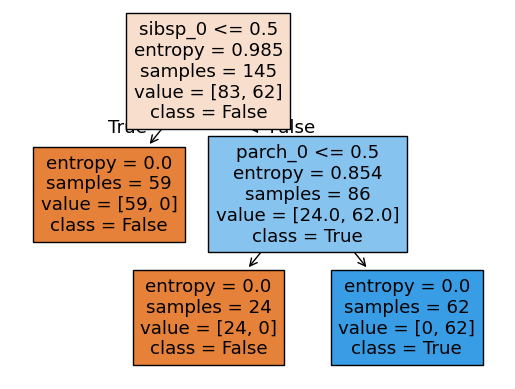

In [176]:
plot_tree(grid.best_estimator_,filled=True,feature_names=['survived_0', 'survived_1', 'pclass_1', 'pclass_2', 'pclass_3',
       'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'parch_0', 'parch_1',
       'parch_2', 'parch_4', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman', 'adult_male_False',
       'adult_male_True', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes', 'age', 'fare'],class_names=['False','True'])